<a href="https://colab.research.google.com/github/Lynda-Starkus/TS-statistical-models/blob/master/implementation_and_comparing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importer les librairies utiles

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew

import sys, os
import random

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython import display, utils

In [6]:
#days, hours, minutes = td.days, td.seconds // 3600, td.seconds // 60 % 60
#Read csv files
solar_wind = pd.read_csv("solar_wind.csv")
solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period","timedelta"], inplace=True)

dst = pd.read_csv("dst_labels.csv")
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period","timedelta"], inplace=True)

sunspots = pd.read_csv("sunspots.csv")
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period","timedelta"], inplace=True)


In [7]:
dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

In [8]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head()

Solar wind shape:  (2900470, 15)


bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period  timedelta                                                             
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period  timedelta                                                            
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   
        0 days 00:03:00    3.68    0.68       6.17   146.17  6.74     1.97   
        0 days 00:04:00    3.68    0.49       4.62   145.72  6.65     1.77   

                          speed  temperature source  
period  timedelta                                    
train_a 0 days 00:00:00  383.92     110237.0     ac  
        0 days 00:01:00  381.79     123825.0     ac  
        0 days 00:02:00  389.11      82548.0     ac  
        0 days 00:03:00  389.11      82548.0     ac  
        0 days 00:04:00  384.26      94269.0     ac

In [9]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head()

Sunspot shape:  (192, 1)


smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4

In [10]:
solar_wind.groupby("period").describe().T

period                  train_a       train_b
bx_gse      count  1.575012e+06  1.139746e+06
            mean  -1.781301e+00 -6.539995e-01
            std    4.339212e+00  3.749282e+00
            min   -5.463000e+01 -2.937000e+01
            25%   -4.960000e+00 -3.430000e+00
...                         ...           ...
temperature min    1.000000e+04  1.000000e+04
            25%    4.364900e+04  3.753600e+04
            50%    7.923800e+04  6.544600e+04
            75%    1.325500e+05  1.135260e+05
            max    6.223700e+06  4.206672e+06

[112 rows x 2 columns]

In [11]:
sunspots.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

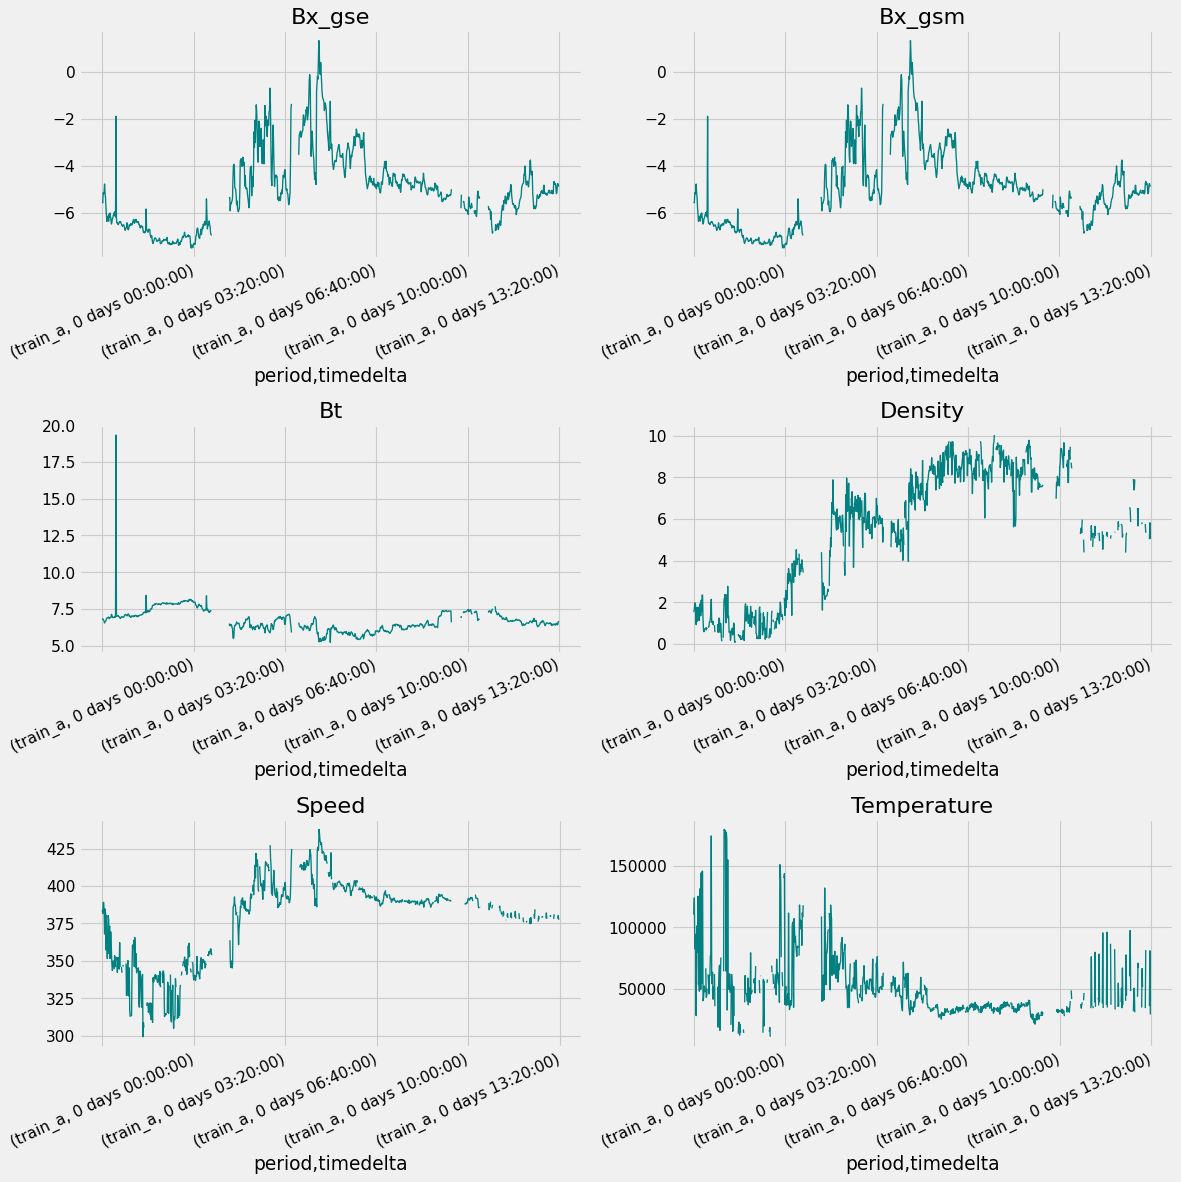

In [12]:
plt.style.use('fivethirtyeight')
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,color='teal', lw=1.2
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()


cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000])

In [13]:
solar_wind.isnull().sum()

bx_gse         185712
by_gse         185712
bz_gse         185713
theta_gse      185713
phi_gse        185713
bx_gsm         185713
by_gsm         185713
bz_gsm         185713
theta_gsm      185713
phi_gsm        185713
bt             185713
density        372094
speed          375196
temperature    394491
source         180569
dtype: int64

<Figure size 1440x1080 with 0 Axes>

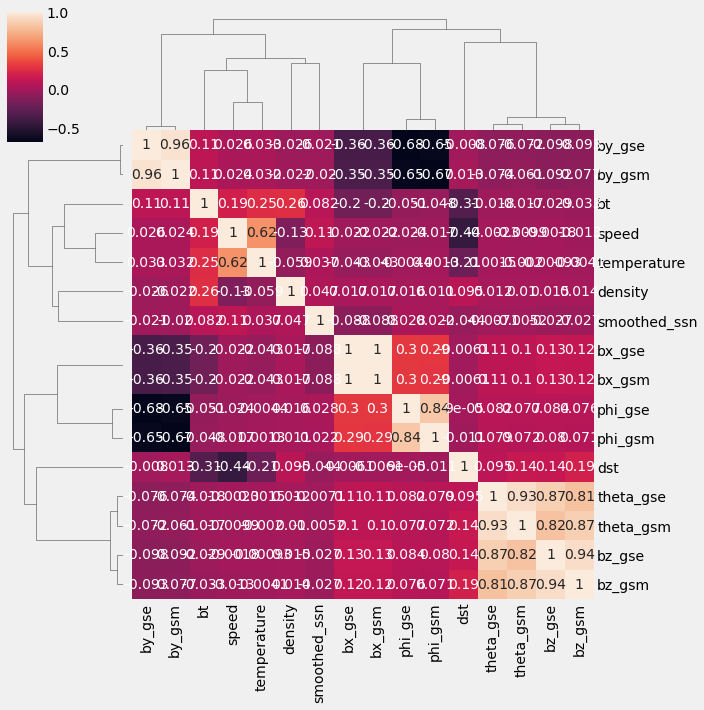

In [14]:
joined = solar_wind.join(sunspots).join(dst).fillna(method="ffill")

plt.figure(figsize=(20, 15))
sns.clustermap(joined.corr(), annot=True)

In [15]:
from sklearn.preprocessing import StandardScaler

# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "speed",
    "density",
]

# all of the features we'll use, including sunspot numbers
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)


def impute_features(feature_df):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # interpolate between missing solar wind values
    feature_df = feature_df.interpolate()
    return feature_df


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]

    # aggregate solar wind data and join with sunspots
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed = impute_features(normalized)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler

In [16]:
features, scaler = preprocess_features(solar_wind, sunspots, subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head()

(48342, 15)


bt_mean    bt_std  temperature_mean  \
period  timedelta                                               
train_a 0 days 00:00:00  0.141493  1.883292         -0.324363   
        0 days 01:00:00  0.184007 -0.274893         -0.454379   
        0 days 02:00:00  0.356603 -0.716254         -0.573459   
        0 days 03:00:00  0.320059 -0.318736         -0.261257   
        0 days 04:00:00 -0.105474 -0.275369         -0.247181   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.384419    -1.243867   -0.437290   
        0 days 01:00:00         0.994049    -1.383982   -0.876390   
        0 days 02:00:00        -0.232946    -1.519978   -1.099052   
        0 days 03:00:00         0.321822    -1.429028   -0.799897   
        0 days 04:00:00         0.189139    -1.014085   -0.530672   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.294296   -0.091478     0.260474   -0.715864   
        0 days 01:00:00     0.084940   -0.361558     0.377795   -0.593173   
        0 days 02:00:00     0.088433   -0.849014     0.638665   -0.922144   
        0 days 03:00:00    -0.400740    0.182917     0.518739   -0.384271   
        0 days 04:00:00    -0.007873    0.787445     0.395123   -0.556629   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.750100   0.842105     -0.776747    -0.280095   
        0 days 01:00:00   -1.021542   0.985832     -0.858716    -0.169683   
        0 days 02:00:00   -1.050663   0.507629     -0.843948    -0.290790   
        0 days 03:00:00   -0.846195  -0.322242     -0.422089     0.037347   
        0 days 04:00:00   -0.600030   1.008573     -0.390759    -0.053313   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00     -1.619268  
        0 days 01:00:00     -1.619268  
        0 days 02:00:00     -1.619268  
        0 days 03:00:00     -1.619268  
        0 days 04:00:00     -1.619268

In [17]:
assert (features.isna().sum() == 0).all()

In [18]:
features.tail()

bt_mean    bt_std  temperature_mean  \
period  timedelta                                                 
train_b 813 days 01:00:00  0.821460 -0.090207         -0.560530   
        813 days 02:00:00  1.253881 -0.014775         -0.454017   
        813 days 03:00:00  0.785551  1.193210         -0.152939   
        813 days 04:00:00  1.735273  0.166256         -0.068664   
        813 days 05:00:00  1.541640 -0.571737         -0.051939   

                           temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                     
train_b 813 days 01:00:00        -0.431989    -1.181703   -0.486985   
        813 days 02:00:00         0.092253    -1.563436   -0.173626   
        813 days 03:00:00         0.248361    -1.340609    0.664334   
        813 days 04:00:00         0.125608    -1.612000    0.504507   
        813 days 05:00:00         0.571989    -2.466931   -0.803931   

                           by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                             
train_b 813 days 01:00:00     1.617163   -0.279858     0.252290   -0.465821   
        813 days 02:00:00     1.775312   -0.409798    -0.036713   -0.168625   
        813 days 03:00:00     0.950033    2.272730     0.150918    1.074924   
        813 days 04:00:00     1.779361    1.911635     1.260335    0.460610   
        813 days 05:00:00     0.946540   -0.455892     0.510276   -0.663286   

                           speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                             
train_b 813 days 01:00:00   -0.634352  -0.247884      1.269891     0.374326   
        813 days 02:00:00   -0.610735  -0.375112      1.586270     0.619760   
        813 days 03:00:00   -0.562861  -0.332656      2.004052     0.497248   
        813 days 04:00:00   -0.418846   0.018767      2.761179     0.778019   
        813 days 05:00:00   -0.531497   0.123944      8.272756    26.334806   

                           smoothed_ssn  
period  timedelta                        
train_b 813 days 01:00:00     -1.590032  
        813 days 02:00:00     -1.590032  
        813 days 03:00:00     -1.590032  
        813 days 04:00:00     -1.590032  
        813 days 05:00:00     -1.590032

In [19]:
from sklearn.model_selection import train_test_split

def get_train_test_val(data, test_per_period, val_per_period):
    """Splits data across periods into train, test, and validation"""
    # assign the last `test_per_period` rows from each period to test
    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]
    # assign the last `val_per_period` from the remaining rows to validation
    val = data.groupby("period").tail(val_per_period)
    # the remaining rows are assigned to train
    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(features, test_per_period=6_000, val_per_period=3_000)

test.head()

bt_mean    bt_std  temperature_mean  \
period  timedelta                                                 
train_a 951 days 00:00:00 -0.978357  0.096807         -0.257094   
        951 days 01:00:00 -1.014679  0.137083         -0.255110   
        951 days 02:00:00 -1.183949  0.371023         -0.177926   
        951 days 03:00:00 -1.240552 -0.426795         -0.117840   
        951 days 04:00:00 -1.195984 -0.581010         -0.091879   

                           temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                     
train_a 951 days 00:00:00        -0.308756     0.553307   -0.493025   
        951 days 01:00:00        -0.349404     0.450851    0.288418   
        951 days 02:00:00        -0.396168     0.635583    0.646412   
        951 days 03:00:00        -0.452663     0.832584   -0.483374   
        951 days 04:00:00        -0.458114     0.863859   -0.446043   

                           by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                             
train_a 951 days 00:00:00    -0.247932    0.162472     0.702435   -0.136809   
        951 days 01:00:00    -0.280779    0.027833     0.643734   -0.320104   
        951 days 02:00:00    -0.191146    0.020528     0.137200   -0.371567   
        951 days 03:00:00    -0.208572   -0.501583     0.116460   -0.376979   
        951 days 04:00:00    -0.291537   -0.449681    -0.102047   -0.586547   

                           speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                             
train_a 951 days 00:00:00   -0.102396  -0.638901     -0.425246    -0.362005   
        951 days 01:00:00   -0.082797  -0.185374     -0.444345    -0.274553   
        951 days 02:00:00   -0.074747  -0.430220     -0.451651    -0.406425   
        951 days 03:00:00   -0.139981  -0.669296     -0.431542    -0.399835   
        951 days 04:00:00   -0.183048  -0.797059     -0.454166    -0.326472   

                           smoothed_ssn  
period  timedelta                        
train_a 951 days 00:00:00      1.403791  
        951 days 01:00:00      1.403791  
        951 days 02:00:00      1.403791  
        951 days 03:00:00      1.403791  
        951 days 04:00:00      1.403791

array([<AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>], dtype=object)

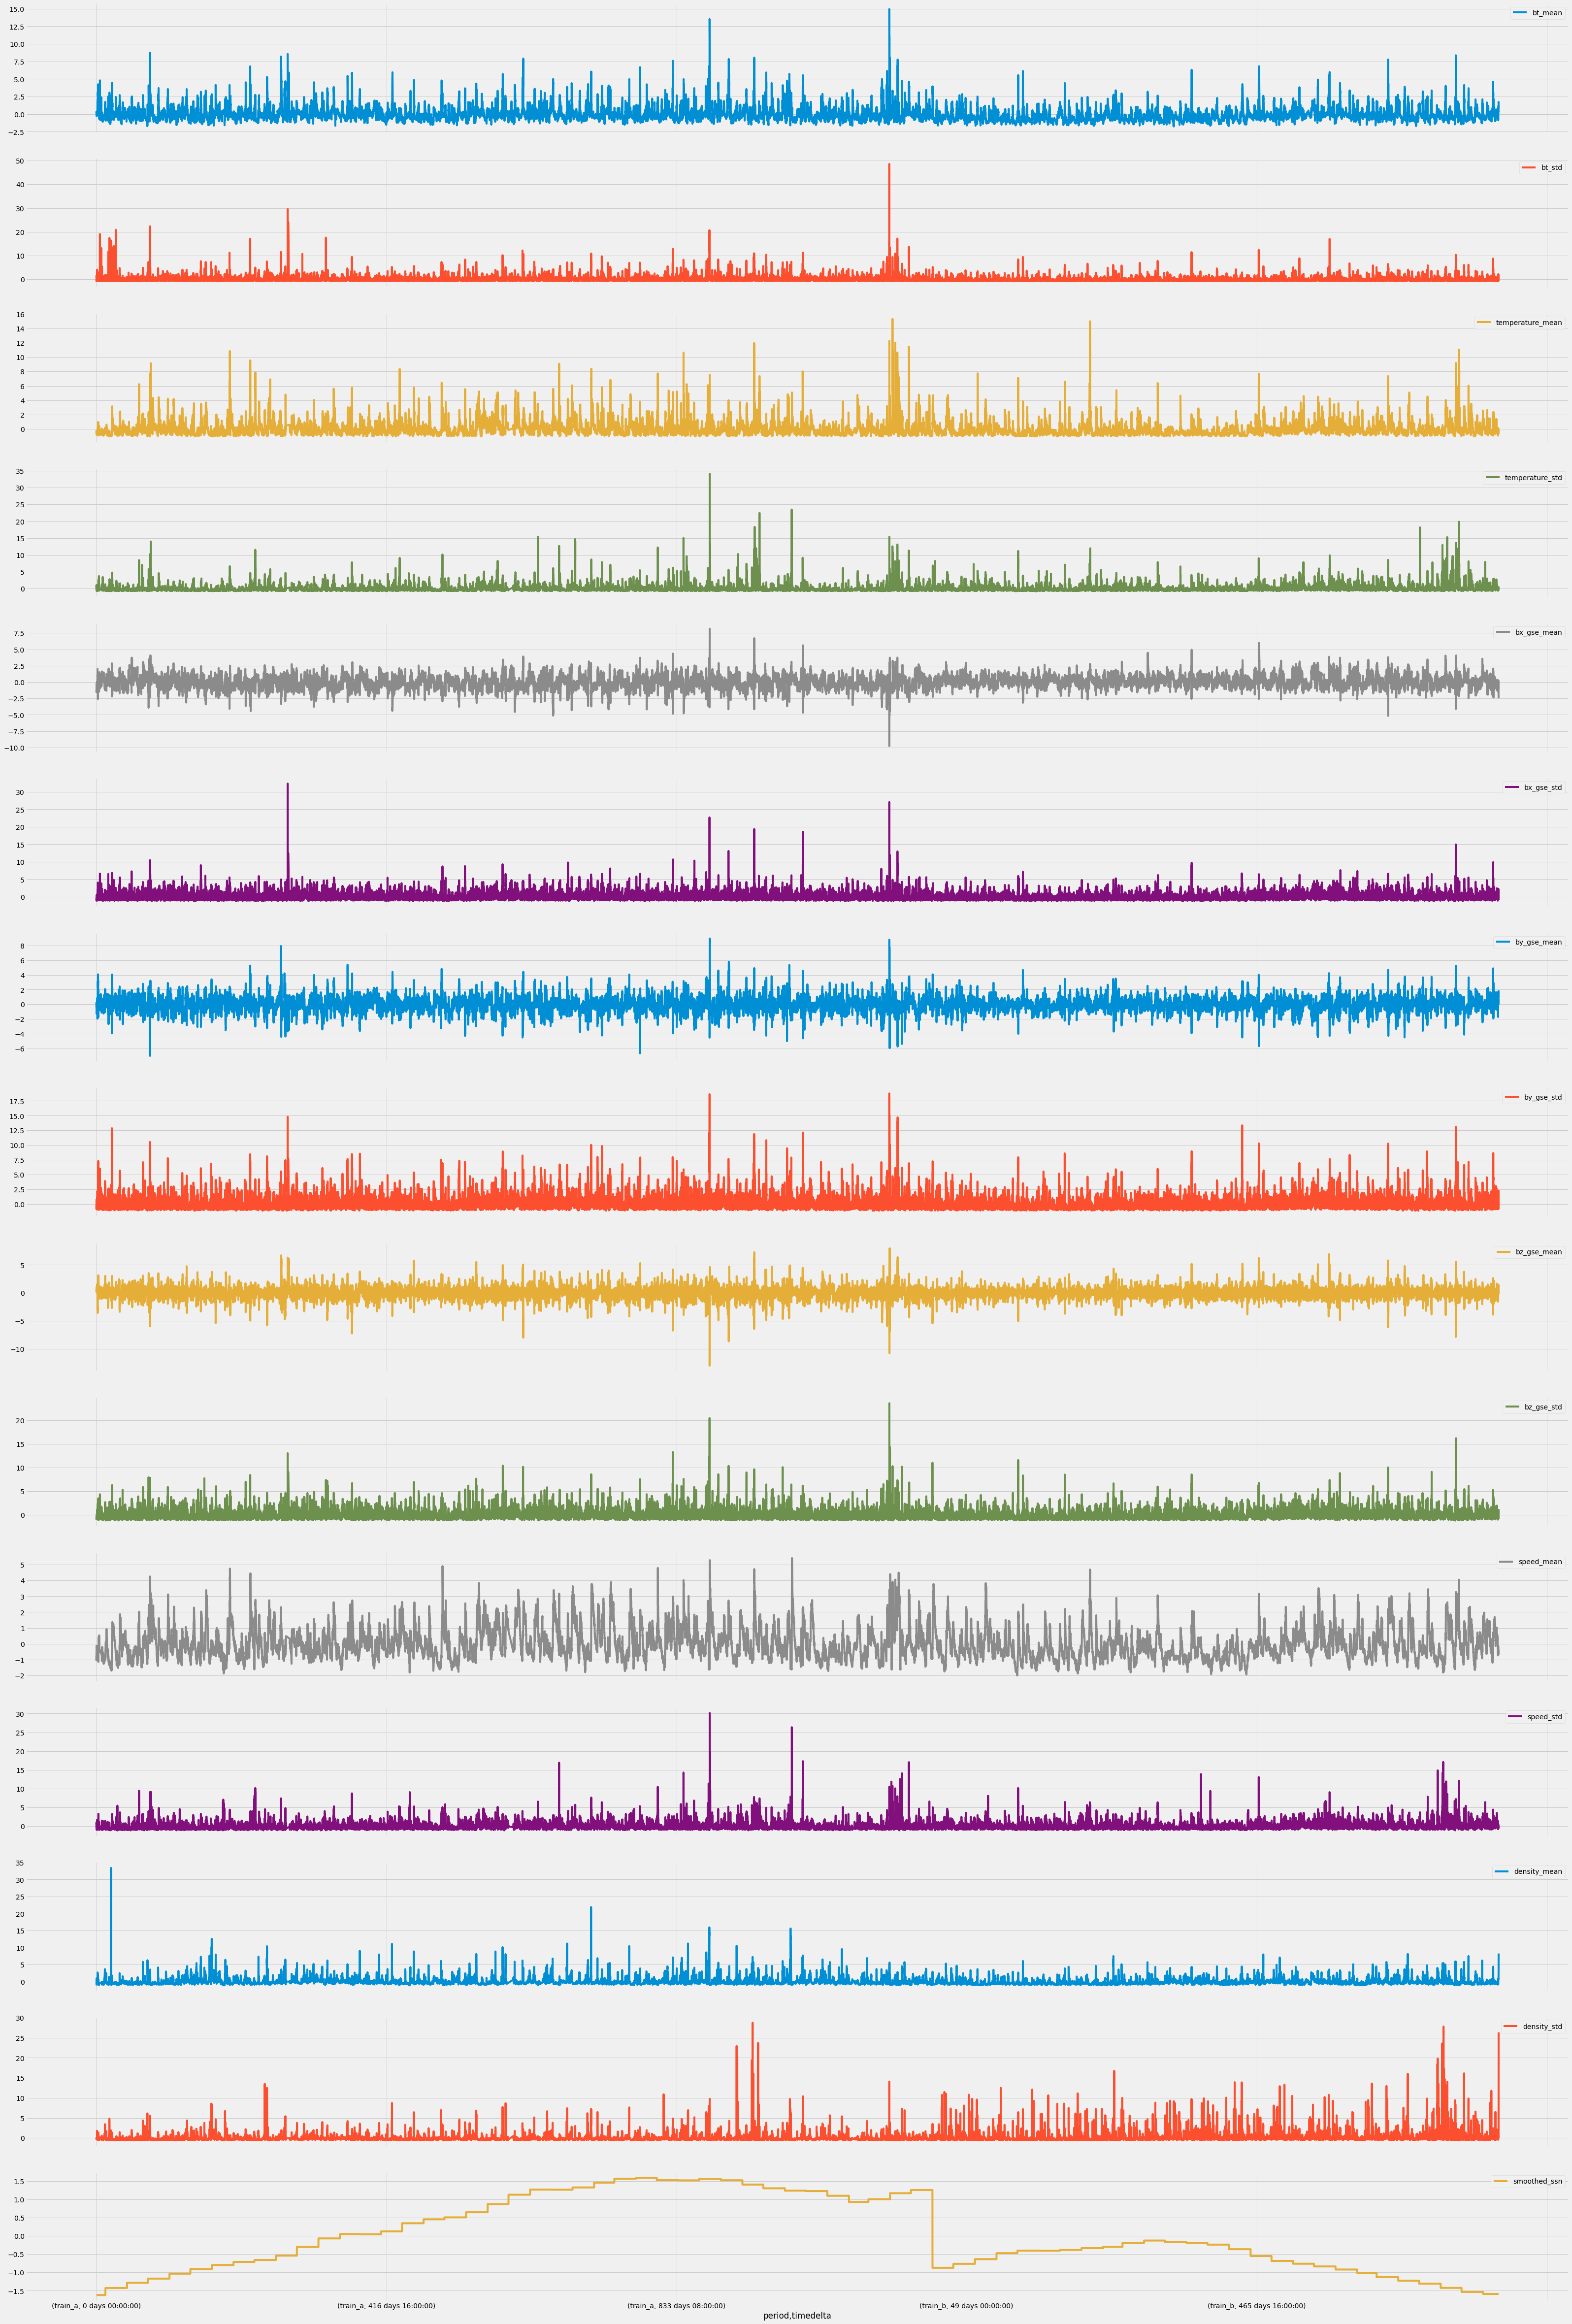

In [20]:
features.plot(subplots=True, figsize=(50,80))

In [21]:
features.tail()
#features_a = features[features['period'] == 'train_a']

bt_mean    bt_std  temperature_mean  \
period  timedelta                                                 
train_b 813 days 01:00:00  0.821460 -0.090207         -0.560530   
        813 days 02:00:00  1.253881 -0.014775         -0.454017   
        813 days 03:00:00  0.785551  1.193210         -0.152939   
        813 days 04:00:00  1.735273  0.166256         -0.068664   
        813 days 05:00:00  1.541640 -0.571737         -0.051939   

                           temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                     
train_b 813 days 01:00:00        -0.431989    -1.181703   -0.486985   
        813 days 02:00:00         0.092253    -1.563436   -0.173626   
        813 days 03:00:00         0.248361    -1.340609    0.664334   
        813 days 04:00:00         0.125608    -1.612000    0.504507   
        813 days 05:00:00         0.571989    -2.466931   -0.803931   

                           by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                             
train_b 813 days 01:00:00     1.617163   -0.279858     0.252290   -0.465821   
        813 days 02:00:00     1.775312   -0.409798    -0.036713   -0.168625   
        813 days 03:00:00     0.950033    2.272730     0.150918    1.074924   
        813 days 04:00:00     1.779361    1.911635     1.260335    0.460610   
        813 days 05:00:00     0.946540   -0.455892     0.510276   -0.663286   

                           speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                             
train_b 813 days 01:00:00   -0.634352  -0.247884      1.269891     0.374326   
        813 days 02:00:00   -0.610735  -0.375112      1.586270     0.619760   
        813 days 03:00:00   -0.562861  -0.332656      2.004052     0.497248   
        813 days 04:00:00   -0.418846   0.018767      2.761179     0.778019   
        813 days 05:00:00   -0.531497   0.123944      8.272756    26.334806   

                           smoothed_ssn  
period  timedelta                        
train_b 813 days 01:00:00     -1.590032  
        813 days 02:00:00     -1.590032  
        813 days 03:00:00     -1.590032  
        813 days 04:00:00     -1.590032  
        813 days 05:00:00     -1.590032

In [ ]:
!pip install darts

In [ ]:
!pip install scalecast

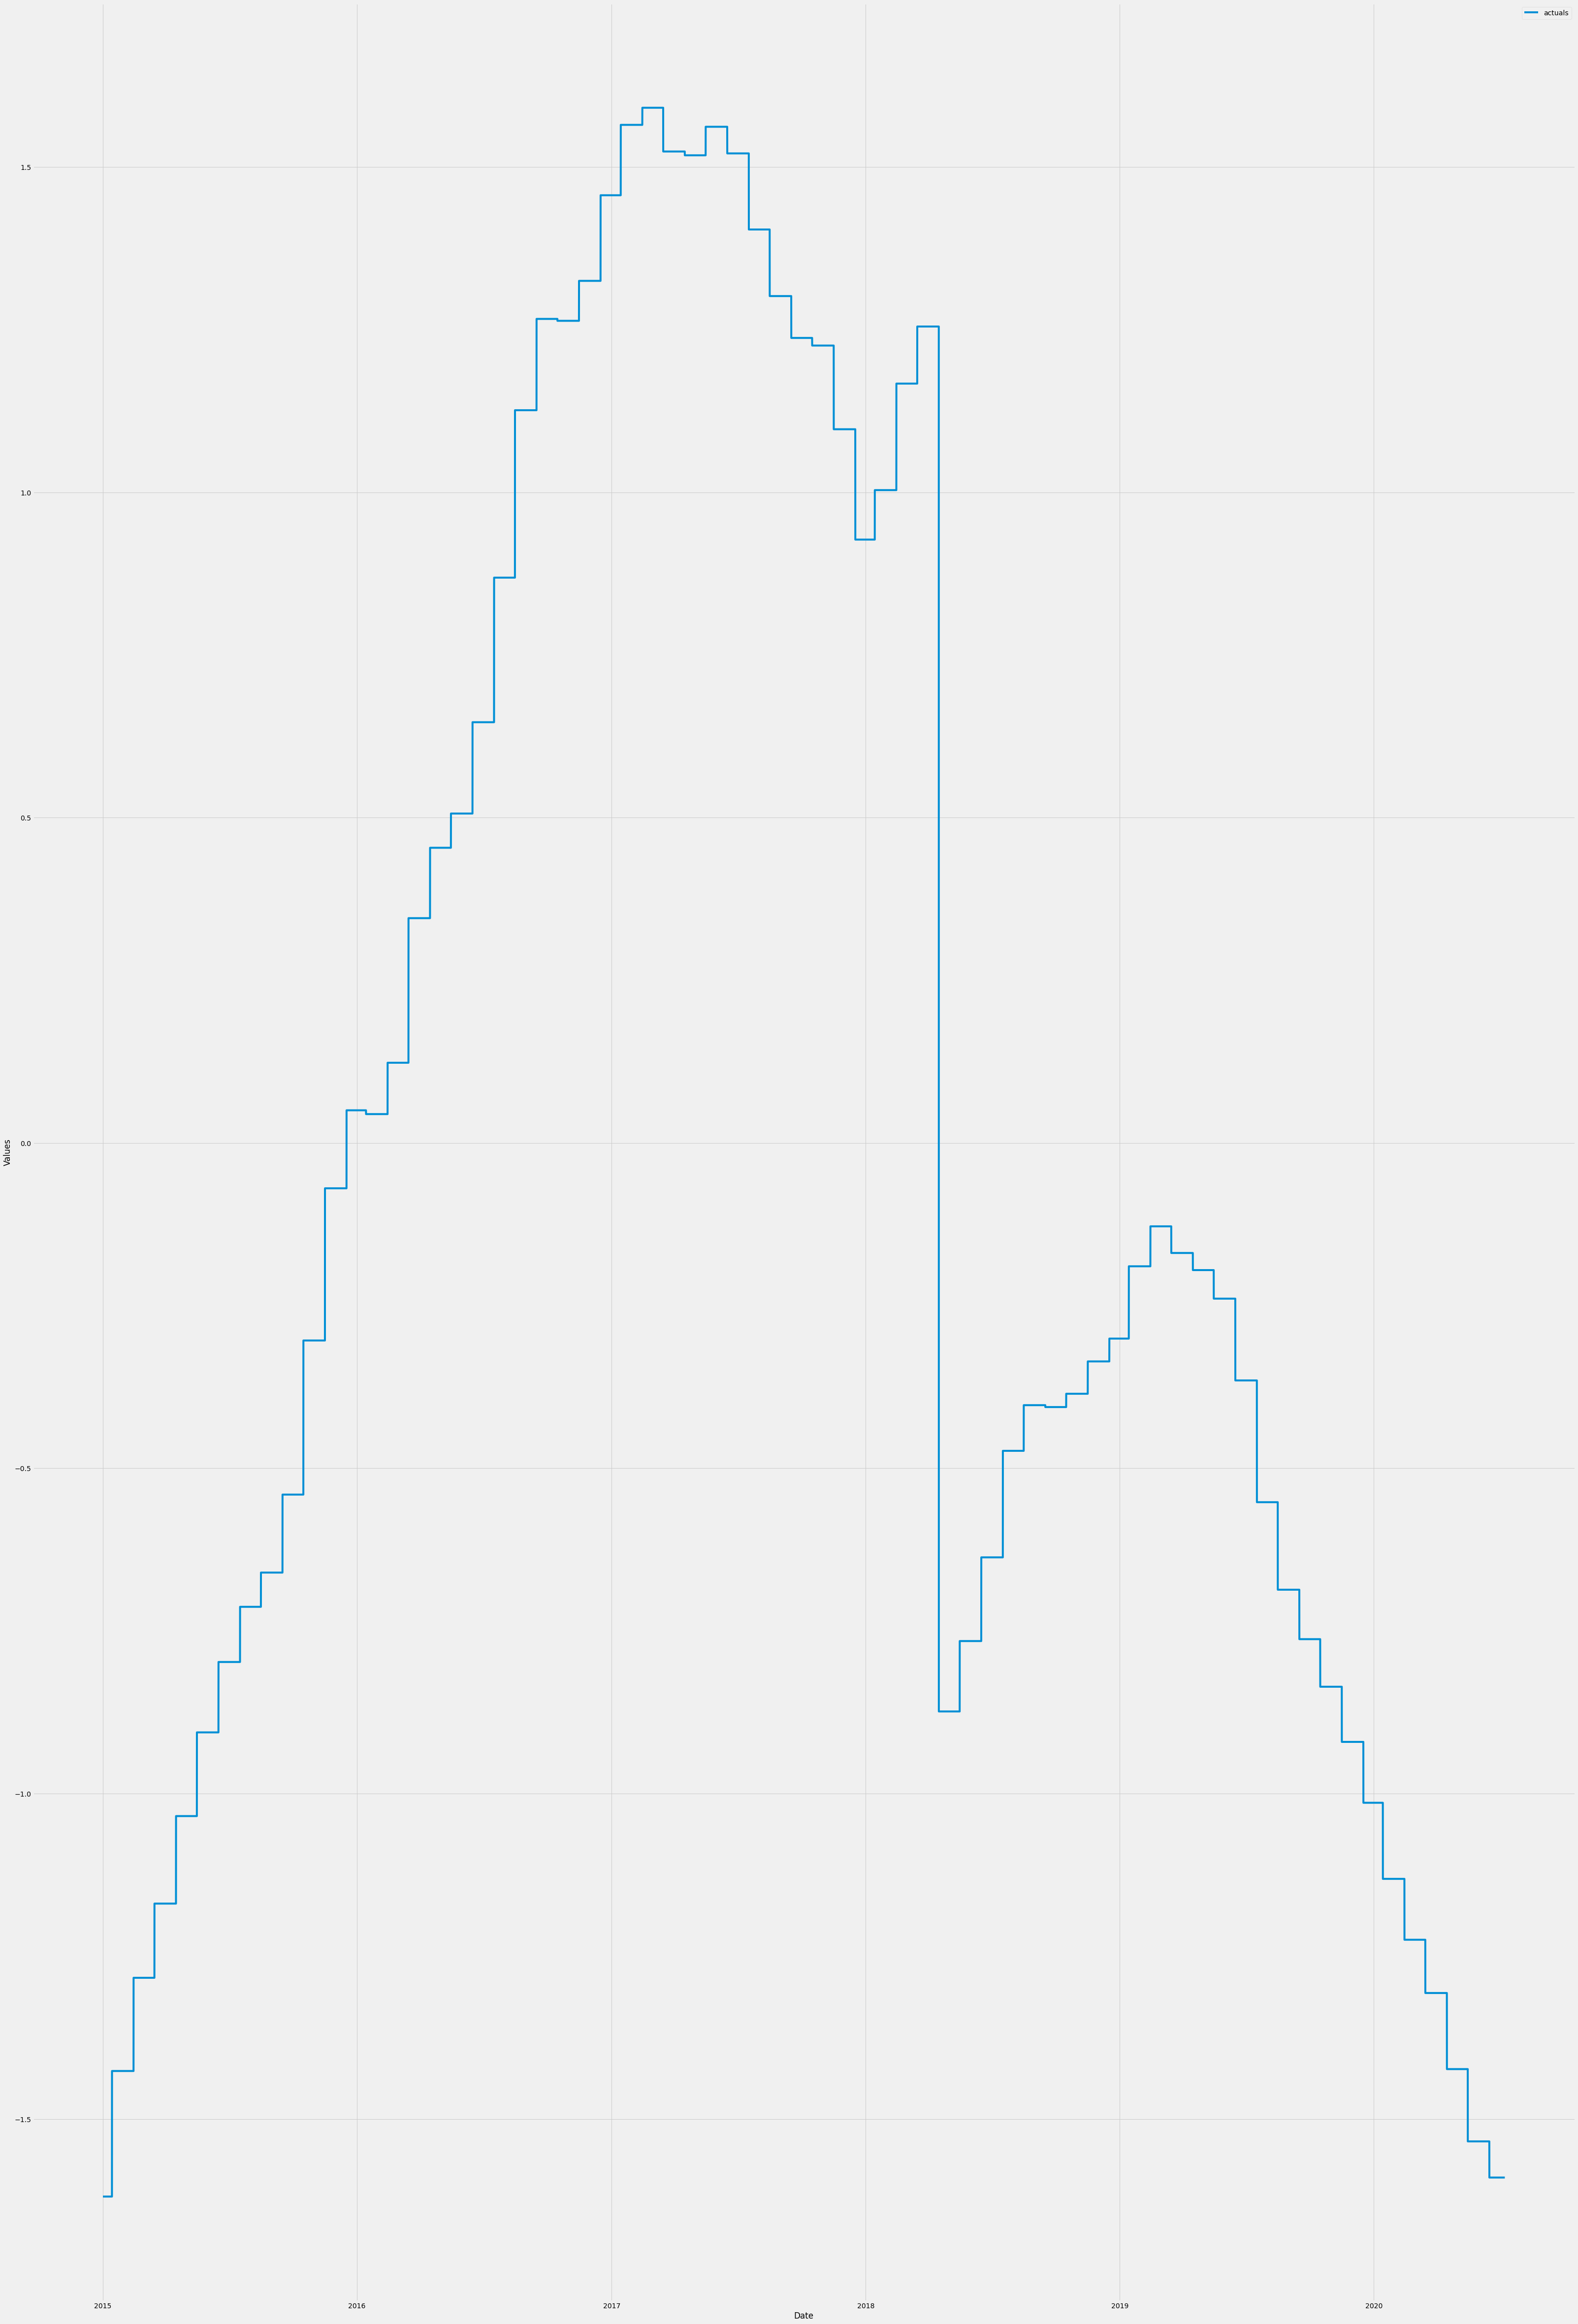

In [44]:
from scalecast.Forecaster import Forecaster
y = features['smoothed_ssn']

current_dates = pd.date_range(
    start='01-01-2015 00:00:00',
    freq='H',
    periods=len(y)
).to_list()
f = Forecaster(y=y,current_dates=current_dates)

#print(current_dates)
f.plot(figsize=(50,80))
plt.show()

In [45]:
f.set_test_length(.25)
f.generate_future_dates(48)

In [ ]:
from darts.utils.utils import (
    SeasonalityMode, 
    TrendMode, 
    ModelMode
)

theta_grid = {
    'theta':[0.5,1,1.5,2,2.5,3],
    'model_mode':[
        ModelMode.ADDITIVE,
        ModelMode.MULTIPLICATIVE
    ],
    'season_mode':[
        SeasonalityMode.MULTIPLICATIVE,
        SeasonalityMode.ADDITIVE
    ],
    'trend_mode':[
        TrendMode.EXPONENTIAL,
        TrendMode.LINEAR
    ],
}

f.set_validation_metric('mape')
f.set_estimator('theta')
f.ingest_grid(theta_grid)
f.cross_validate(k=3)

In [50]:
f.auto_forecast()

  aic = self.nobs * np.log(sse / self.nobs) + k * 2

  aicc = aic + aicc_penalty

  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)



KeyboardInterrupt: ignored